# <font color=green>__GraviPy__ </font>

## https://pypi.org/project/GraviPy/

### Está paquetería de Python es útil en Relatividad General. 
### Para una métrica $g^{\mu \nu}$ en ciertas coordenadas $x^\mu = (x^1,x^2,x^3,x^4)$, lo que hace está paquetería de Python son cálculos para obtener los símbolos de Christofell $\Gamma^{\ \sigma}_{\mu \nu}$, el tensor de Riemann $R^{\sigma}_{\mu \nu \gamma}$, el tensor de Ricci $R^{\mu \nu}$, el escalar de Ricci $R$, la ecuación de geodésicas entre otras propiedades. 

### Obtener esto es necesario para resolver las ecuaciones de Einstein para una métrica $g^{\mu \nu}$.

### $G_{\mu \nu} = R_{\mu \nu} - \dfrac{1}{2}R g_{\mu \nu} = 8\pi G T_{\mu \nu} $ .

## <font color=red>__NOTA__: </font>

###  La convención de índices que utiliza GraviPy es: 
###  $\bullet$      $\chi(-i)$   para índices  contravariantes  $ \chi^\mu $ .
###  $\bullet$       $\chi(+i)$  para índices covariantes $ \chi_\mu $ .
#### Las unidades que se manejan son $c=1$. 

### Las formulas que usa está paquetería de Python son:

### $\circ \quad $  $\Gamma^{\sigma}_{\ \mu \nu} = \dfrac{1}{2} g^{\sigma \gamma }\left( g_{\gamma \mu, \nu } + g_{\gamma \nu, \mu } - g_{\mu \nu , \gamma } \right) $ 

### $\circ \quad $ $R^{\rho}_{\sigma \mu \nu } = \partial_\mu \Gamma^{ \rho}_{\ \nu \sigma} -  \partial_\nu \Gamma^{\rho}_{\ \mu \sigma} + \Gamma^{ \rho}_{\ \mu \lambda}  \Gamma^{ \lambda}_{\ \nu \sigma} - \Gamma^{ \rho}_{\ \nu \lambda} \Gamma^{\lambda}_{\ \mu \sigma}  $

### $\circ \quad $ $R_{\mu \nu} = R^{\sigma}_{\mu \sigma \nu} $

### $\circ \quad $ $R = R_{\mu \nu} g^{\mu \nu}$

### $\circ \quad $ $\dfrac{d^2 x^\mu}{ds^2} + \Gamma^{\mu}_{\ \alpha \beta} \dfrac{d x^\alpha}{ds} \dfrac{d x^\beta}{ds} = 0$



In [6]:
import numpy as np
from sympy import *    
from gravipy import *  
from gravipy.tensorial import *

#  <font color=purple>__Métrica S2__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu = a^2 \left(d \theta^2 + sin^2 \theta  d \phi^2 \right)$ 

In [10]:
init_printing()


a, theta, phi= symbols('a, \\theta, \phi') #Define los símbolos

chi = Coordinates('\chi', [theta, phi]) #Crea el 4-Vector

Metric = diag(a** 2, a** 2 * sin(theta) ** 2) # Define la métrica

g = MetricTensor('g', chi, Metric) #Los índices corren de 1,2,3,4.

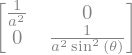

In [17]:
g(-All, -All)

In [21]:
g(2, 2).diff(chi(-1))

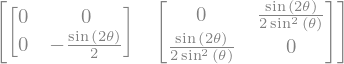

In [30]:
Ga = Christoffel('Ga', g) # Símbolos de christoffel
Ga(-All, All, All)    # \Gamma^\mu_(\nu \sigma)
#Ga.components

In [51]:
print(latex(Ga(-All, All, All)  ))

\left[\begin{matrix}\left[\begin{matrix}0 & 0\\0 & - \frac{\sin{\left(2 \theta \right)}}{2}\end{matrix}\right] & \left[\begin{matrix}0 & \frac{\sin{\left(2 \theta \right)}}{2 \sin^{2}{\left(\theta \right)}}\\\frac{\sin{\left(2 \theta \right)}}{2 \sin^{2}{\left(\theta \right)}} & 0\end{matrix}\right]\end{matrix}\right]


$\left[\begin{matrix}\left[\begin{matrix}0 & 0\\0 & - \frac{\sin{\left(2 \theta \right)}}{2}\end{matrix}\right] & \left[\begin{matrix}0 & \frac{\sin{\left(2 \theta \right)}}{2 \sin^{2}{\left(\theta \right)}}\\\frac{\sin{\left(2 \theta \right)}}{2 \sin^{2}{\left(\theta \right)}} & 0\end{matrix}\right]\end{matrix}\right]
$

In [39]:
expand_trig(-sin(2*theta)/2)

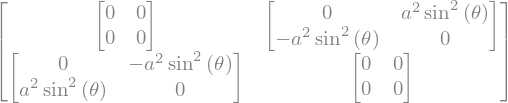

In [41]:
Rm = Riemann('Rm', g)
Rm(All,All,All,All) 

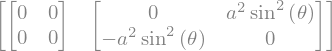

In [46]:
Rm(1, All, All, All) 

In [47]:
Rm(-1, 2, 1, 2) 

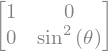

In [48]:
Ri = Ricci('Ri', g)   #Tensor de Ricci
Ri(All,All)

In [49]:
Ri.scalar()

In [ ]:
G = Einstein('G', Ri)   #Tensor de Einstein
G(All,All)

In [ ]:
Rm(1,2,1,2)/g(All, All).det()

# <font color=purple>__Métrica de Schwarzschild__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu= -\left(1 - \dfrac{2GM}{r}  \right) dt^2 + \left(1 - \dfrac{2GM}{r}  \right)^{-1} dr^2 + r^2 d \theta^2 + r^2 sin^2 \theta  d \phi^2$ 

t
r
\theta
\phi


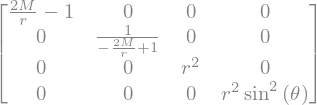

In [7]:
import numpy as np
from sympy import *    
from gravipy import *  

init_printing()

x,y,z = symbols('x, y, z')
#print x
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M') #Define los símbolos
#print r


chi = Coordinates('\chi', [t, r, theta, phi])  #Crea el 4-Vector  

Metric = diag(-(1 - 2 * M / r), 1 / (1 - 2 * M / r), r ** 2, r ** 2 * sin(theta) ** 2) # Define la métrica

g = MetricTensor('g', chi, Metric)  #Los índices corren de 1,2,3,4.

#print chi(1)
for i in range(4):   
    print (chi(-i-1))
#print g(-All, -All) #g^(\mu \nu)
g(All, All)  #g_(\mu \nu)
#g.components

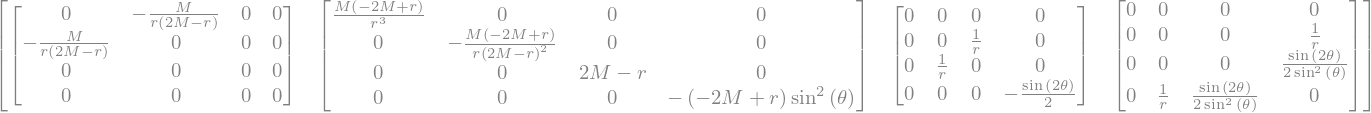

In [8]:
Ga = Christoffel('Ga', g) # Símbolos de Christofell
Ga(-All, All, All)    # \Gamma^\mu_(\nu \sigma)
#Ga.components

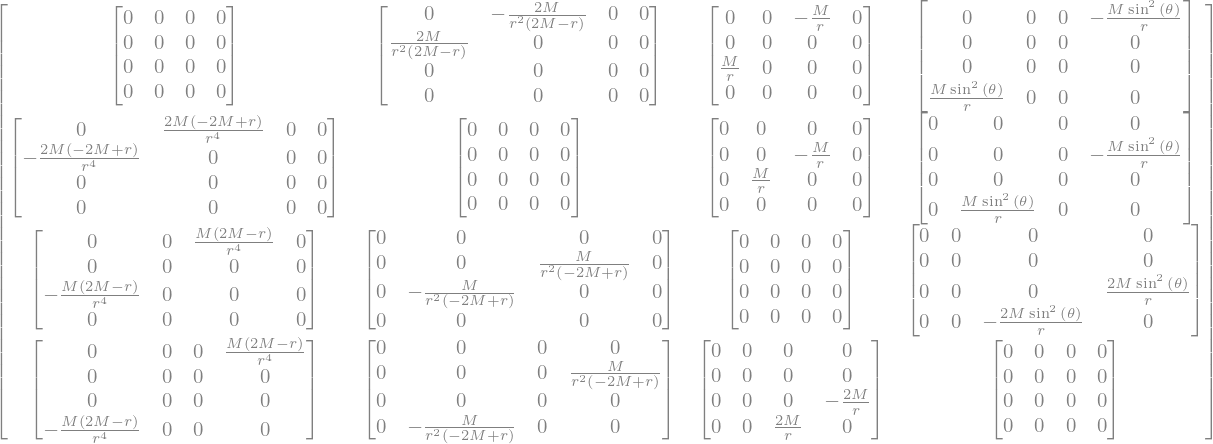

In [9]:
Rm = Riemann('Rm', g)
Rm(-All,All,All,All) 

In [ ]:
#Rm = Riemann('Rm', g)
#ricci = sum([Rm(i, All, k, All)*g(-i, -k) for i, k in list(variations(range(1, 5), 2, True))], zeros(4))#Contracción de indices
#ricci.simplify()
#ricci

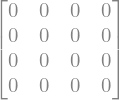

In [10]:
Ri = Ricci('Ri', g)   #Tensor de Ricci
Ri(All,All)

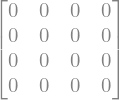

In [11]:
G = Einstein('G', Ri)   #Tensor de Einstein
G(-All,-All)

In [12]:
tau = symbols('\\tau')
w = Geodesic('w', g, tau)     #Ecuación de Geodésicas

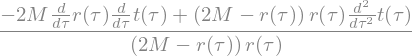

In [13]:
w(-1)

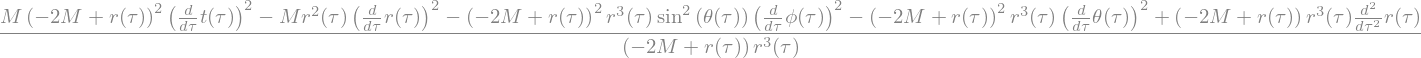

In [14]:
w(-2)

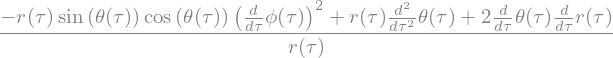

In [15]:
w(-3)

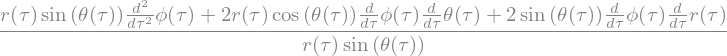

In [16]:
w(-4)

In [17]:
not any([(Rm.covariantD(i, j, k, l, m) + Rm.covariantD(i, j, m, k, l) + Rm.
covariantD(i, j, l, m, k)).simplify() \
for i, j, k, l, m in list(variations(range(1, 5), 5, True))])

True

#  <font color=purple>__Deduccion de FLRW__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu =   \left(B(r)d r^2 + r^2 d \theta^2 + r^2 sin^2 \theta  d \phi^2 \right)$ 

In [63]:
r, theta, phi, K = symbols('r, \\theta, \phi, K') #Define los símbolos

B = Function('B')
A = Function('A')
C = Function('C')


chi = Coordinates('\chi', [r, theta, phi])  #Crea el 4-Vector  
#u = Coordinates('u', [1,0,0,0])   # 4-Velocidad para un observador en reposo

Metric = diag(B(r,theta),  A(r,theta),  C(r,theta)) # Define la métrica

#g = MetricTensor('g', u, Metric)  #Los índices corren de 1,2,3,4.
g = MetricTensor('g', chi, Metric)  #Los índices corren de 1,2,3,4.


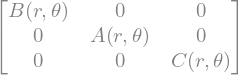

In [64]:
g(All, All)

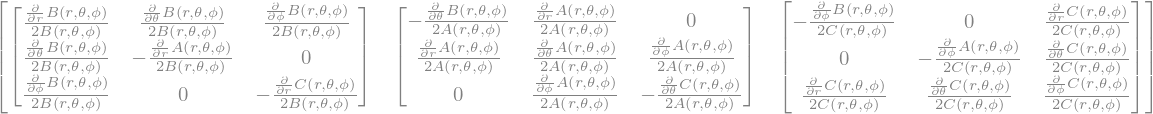

In [62]:
Ga = Christoffel('Ga', g) # Símbolos de Christofell
Ga(-All, All, All) 

In [50]:
r, theta, phi, K = symbols('r, \\theta, \phi, K') #Define los símbolos

B = Function('B')

chi = Coordinates('\chi', [r, theta, phi])  #Crea el 4-Vector  
#u = Coordinates('u', [1,0,0,0])   # 4-Velocidad para un observador en reposo

Metric = diag(B(r),  r ** 2,  r ** 2 * sin(theta) ** 2) # Define la métrica

#g = MetricTensor('g', u, Metric)  #Los índices corren de 1,2,3,4.
g = MetricTensor('g', chi, Metric)  #Los índices corren de 1,2,3,4.


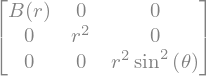

In [51]:
g(All, All)

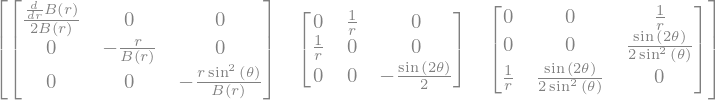

In [52]:
Ga = Christoffel('Ga', g) # Símbolos de Christofell
Ga(-All, All, All)    # \Gamma^\mu_(\nu \sigma)
#Ga.components

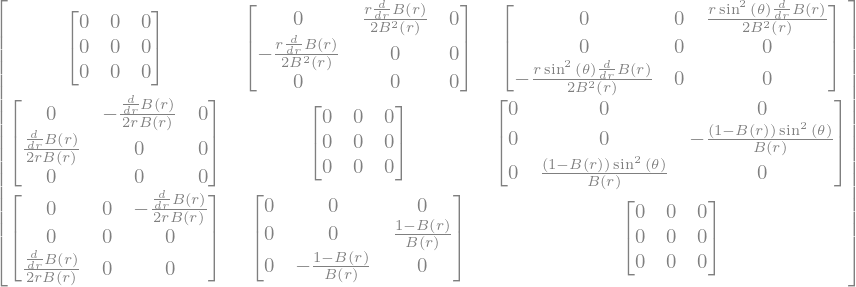

In [53]:
Rm = Riemann('Rm', g)
Rm(-All,All,All,All) 

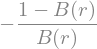

In [54]:
Rm(-3, 2, 3, 2)

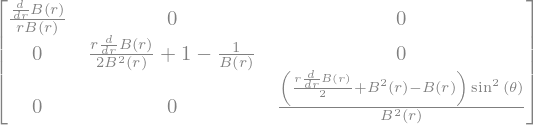

In [55]:
Ri = Ricci('Ri', g)   #Tensor de Ricci
Ri(All,All)

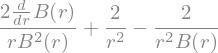

In [56]:
Ri.scalar()

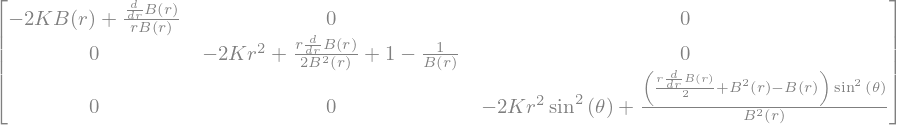

In [57]:
eq = Ri(All,All) -2*K*g(All, All)   # = 0
eq

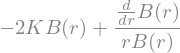

In [26]:
eq[0] # =0

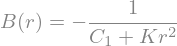

In [27]:
sol = dsolve(eq[0], B(r))
sol

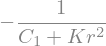

In [28]:
sol.args[1]

In [29]:
#eq[1,1]
eq[4].subs(B(r),sol.args[1]).doit()  # =0 

#  <font color=purple>__Métrica de FLRW__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu = -dt^2 + a^2(t) \left(\dfrac{d \chi^2}{1- k \chi^2} + \chi^2 d \theta^2 + \chi^2 sin^2 \theta  d \phi^2 \right)$ 

# <font color=purple>__Tensor de energía momento__: </font>

## En este caso el $T_{\mu \nu}$ es para un fluido perfecto.

## $T_{\mu \nu} = (\rho + P) u_\mu u_\nu + P g_{\mu \nu}$

#  <font color=purple>__Métrica de Bianchi type III__: </font>

### En este caso se muestra la solución para la métrica:

### $ds^2 = g_{\mu \nu}dx^\mu dx^\nu = -dt^2 + a^2(t)d x^2 + b^2(t)e^{-2\alpha x} d y^2 + c^2(t)  d z^2 $ 